In [93]:
!pip install --upgrade botocore==1.23.26
!pip install --upgrade urllib3==1.22.0
!pip install py7zr
!pip install s3fs
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartogether
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install geopy
!pip install pynsee[full]

  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.23.26 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.
boto3 1.26.13 requires botocore<1.30.0,>=1.29.13, but you have botocore 1.23.26 which is incompatible.
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.26.13 r

In [119]:
import contextily as ctx
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib

In [103]:
df_boulangeries = pd.read_csv('/home/onyxia/work/Projet-2A/boulangerie.csv')
df_boucheries = pd.read_csv('/home/onyxia/work/Projet-2A/boucheries.csv')
df_librairies = pd.read_csv('/home/onyxia/work/Projet-2A/librairies.csv')
df_pharmacies = pd.read_csv('/home/onyxia/work/Projet-2A/pharmacies.csv')
niveau_vie = gpd.read_file('/home/onyxia/work/niveau_de_vie_commune.csv')

In [104]:
niveau_vie

,CODGEO,LIBGEO,MED14,geometry
0,01001,L'Abergement-Clémenciat,"21576,7",None
1,01002,L'Abergement-de-Varey,"21672,9",None
2,01004,Ambérieu-en-Bugey,"19756,1",None
3,01005,Ambérieux-en-Dombes,"23204,8",None
4,01006,Ambléon,"22157,5",None
...,...,...,...,...
36616,97420,Sainte-Suzanne,"14125,6",None
36617,97421,Salazie,"10827,4",None
36618,97422,Le Tampon,"13349,4",None
36619,97423,Les Trois-Bassins,"13104,5",None


In [105]:
liste_departements=["75", "92", "93", "94"]
department=[]
for ville in niveau_vie.CODGEO:
    department.append(ville[:2])
niveau_vie['departement']=department
niveau_vie=niveau_vie[niveau_vie.departement.isin(liste_departements)]
niveau_vie = niveau_vie.reset_index(drop = True)
niveau_vie

,CODGEO,LIBGEO,MED14,geometry,departement
0,75056,Paris,"26194,7",None,75
1,75101,Paris 1er Arrondissement,"31574,5",None,75
2,75102,Paris 2e Arrondissement,"29296,0",None,75
3,75103,Paris 3e Arrondissement,"30560,7",None,75
4,75104,Paris 4e Arrondissement,"30385,5",None,75
...,...,...,...,...,...
139,94077,Villeneuve-le-Roi,"20428,7",None,94
140,94078,Villeneuve-Saint-Georges,"15491,9",None,94
141,94079,Villiers-sur-Marne,"21081,3",None,94
142,94080,Vincennes,"30530,7",None,94


In [106]:
import cartiflette.s3

cities = cartiflette.s3.download_vectorfile_url_all(
    values = ["75", "92", "93", "94"],
    level="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)


cities

Downloading: : 223kiB [00:00, 36.4MiB/s]
Downloading: : 361kiB [00:00, 46.0MiB/s]
Downloading: : 809kiB [00:00, 35.8MiB/s]
Downloading: : 726kiB [00:00, 45.3MiB/s]


,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,INSEE_ARM,INSEE_COG,geometry
0,ARR_MUNI0000000009736045,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,NR,1,75,11,200054781,75103,75103,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ..."
1,ARR_MUNI0000000009736046,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,NR,1,75,11,200054781,75102,75102,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ..."
2,ARR_MUNI0000000009736545,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,75104,75104,"POLYGON ((2.36849 48.85581, 2.36873 48.85482, ..."
3,ARR_MUNI0000000009736544,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75056,Capitale d'état,58227,NR,1,75,11,200054781,75105,75105,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ..."
4,ARR_MUNI0000000009736543,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75056,Capitale d'état,40303,NR,1,75,11,200054781,75106,75106,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,COMMUNE_0000000009736528,Maisons-Alfort,MAISONS-ALFORT,94046,Commune simple,56483,13,2,94,11,200054781/200057941,None,94046,"POLYGON ((2.41592 48.81625, 2.41627 48.81631, ..."
43,COMMUNE_0000000009737462,Mandres-les-Roses,MANDRES-LES-ROSES,94047,Commune simple,4777,16,1,94,11,200054781/200058006,None,94047,"POLYGON ((2.52684 48.70468, 2.52683 48.70477, ..."
44,COMMUNE_0000000009736520,Nogent-sur-Marne,NOGENT-SUR-MARNE,94052,Sous-préfecture,34042,95,2,94,11,200054781/200057941,None,94052,"POLYGON ((2.49765 48.83081, 2.49716 48.83081, ..."
45,COMMUNE_0000000009736998,Sucy-en-Brie,SUCY-EN-BRIE,94071,Commune simple,27157,18,1,94,11,200054781/200058006,None,94071,"POLYGON ((2.51245 48.78479, 2.51359 48.78565, ..."


In [110]:
cities["MED14"] = [np.NaN for k in range(len(cities))]

In [111]:

for k in range(len(cities)):
    if cities["INSEE_DEP"].iloc[k] == '75':
        cities["MED14"].iloc[k] = niveau_vie.loc[niveau_vie["CODGEO"] == cities["INSEE_ARM"].iloc[k], "MED14"]
    else:
        cities["MED14"].iloc[k] = niveau_vie.loc[niveau_vie["CODGEO"] == cities["INSEE_COM"].iloc[k], "MED14"]
cities = cities.replace(',', '.', regex=True)
cities = cities.loc[cities["MED14"] != ""]
cities = cities.reset_index(drop = True)

/tmp/ipykernel_826/2515786411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities["MED14"].iloc[k] = niveau_vie.loc[niveau_vie["CODGEO"] == cities["INSEE_ARM"].iloc[k], "MED14"]


In [112]:
cities

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,INSEE_ARM,INSEE_COG,geometry,MED14
0,ARR_MUNI0000000009736045,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,NR,1,75,11,200054781,75103,75103,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...","[30560,7]"
1,ARR_MUNI0000000009736046,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,NR,1,75,11,200054781,75102,75102,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...","[29296,0]"
2,ARR_MUNI0000000009736545,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,75104,75104,"POLYGON ((2.36849 48.85581, 2.36873 48.85482, ...","[30385,5]"
3,ARR_MUNI0000000009736544,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75056,Capitale d'état,58227,NR,1,75,11,200054781,75105,75105,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...","[32717,5]"
4,ARR_MUNI0000000009736543,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75056,Capitale d'état,40303,NR,1,75,11,200054781,75106,75106,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...","[38213,3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,COMMUNE_0000000009736528,Maisons-Alfort,MAISONS-ALFORT,94046,Commune simple,56483,13,2,94,11,200054781/200057941,None,94046,"POLYGON ((2.41592 48.81625, 2.41627 48.81631, ...","[24125,2]"
139,COMMUNE_0000000009737462,Mandres-les-Roses,MANDRES-LES-ROSES,94047,Commune simple,4777,16,1,94,11,200054781/200058006,None,94047,"POLYGON ((2.52684 48.70468, 2.52683 48.70477, ...","[26280,0]"
140,COMMUNE_0000000009736520,Nogent-sur-Marne,NOGENT-SUR-MARNE,94052,Sous-préfecture,34042,95,2,94,11,200054781/200057941,None,94052,"POLYGON ((2.49765 48.83081, 2.49716 48.83081, ...","[30012,0]"
141,COMMUNE_0000000009736998,Sucy-en-Brie,SUCY-EN-BRIE,94071,Commune simple,27157,18,1,94,11,200054781/200058006,None,94071,"POLYGON ((2.51245 48.78479, 2.51359 48.78565, ...","[25180,4]"


In [113]:
for k in range(len(cities)):
    cities["MED14"][k] = (cities["MED14"].iloc[k])[0]
cities = cities.replace(',', '.', regex=True)
cities = cities.loc[cities["MED14"] != ""]
cities = cities.reset_index(drop = True)

/tmp/ipykernel_826/502407345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities["MED14"][k] = (cities["MED14"].iloc[k])[0]


In [114]:
cities

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,INSEE_ARM,INSEE_COG,geometry,MED14
0,ARR_MUNI0000000009736045,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,NR,1,75,11,200054781,75103,75103,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",30560.7
1,ARR_MUNI0000000009736046,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,NR,1,75,11,200054781,75102,75102,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",29296.0
2,ARR_MUNI0000000009736545,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,75104,75104,"POLYGON ((2.36849 48.85581, 2.36873 48.85482, ...",30385.5
3,ARR_MUNI0000000009736544,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75056,Capitale d'état,58227,NR,1,75,11,200054781,75105,75105,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",32717.5
4,ARR_MUNI0000000009736543,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75056,Capitale d'état,40303,NR,1,75,11,200054781,75106,75106,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",38213.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,COMMUNE_0000000009736528,Maisons-Alfort,MAISONS-ALFORT,94046,Commune simple,56483,13,2,94,11,200054781/200057941,None,94046,"POLYGON ((2.41592 48.81625, 2.41627 48.81631, ...",24125.2
139,COMMUNE_0000000009737462,Mandres-les-Roses,MANDRES-LES-ROSES,94047,Commune simple,4777,16,1,94,11,200054781/200058006,None,94047,"POLYGON ((2.52684 48.70468, 2.52683 48.70477, ...",26280.0
140,COMMUNE_0000000009736520,Nogent-sur-Marne,NOGENT-SUR-MARNE,94052,Sous-préfecture,34042,95,2,94,11,200054781/200057941,None,94052,"POLYGON ((2.49765 48.83081, 2.49716 48.83081, ...",30012.0
141,COMMUNE_0000000009736998,Sucy-en-Brie,SUCY-EN-BRIE,94071,Commune simple,27157,18,1,94,11,200054781/200058006,None,94071,"POLYGON ((2.51245 48.78479, 2.51359 48.78565, ...",25180.4


In [115]:
cities_essential = cities[["NOM", "INSEE_COM", "INSEE_ARM", "geometry", "MED14"]]

In [116]:
cities_essential

,NOM,INSEE_COM,INSEE_ARM,geometry,MED14
0,Paris 3e Arrondissement,75056,75103,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",30560.7
1,Paris 2e Arrondissement,75056,75102,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",29296.0
2,Paris 4e Arrondissement,75056,75104,"POLYGON ((2.36849 48.85581, 2.36873 48.85482, ...",30385.5
3,Paris 5e Arrondissement,75056,75105,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",32717.5
4,Paris 6e Arrondissement,75056,75106,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",38213.3
...,...,...,...,...,...
138,Maisons-Alfort,94046,None,"POLYGON ((2.41592 48.81625, 2.41627 48.81631, ...",24125.2
139,Mandres-les-Roses,94047,None,"POLYGON ((2.52684 48.70468, 2.52683 48.70477, ...",26280.0
140,Nogent-sur-Marne,94052,None,"POLYGON ((2.49765 48.83081, 2.49716 48.83081, ...",30012.0
141,Sucy-en-Brie,94071,None,"POLYGON ((2.51245 48.78479, 2.51359 48.78565, ...",25180.4


In [120]:
MED_14 = [float(cities_essential["MED14"].iloc[k]) for k in range(len(cities_essential))]
MED_14_norm = (MED_14-np.min(MED_14))/(np.max(MED_14) - np.min(MED_14))

In [124]:
cities_essential["MED_14_norm"] = MED_14_norm

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [126]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

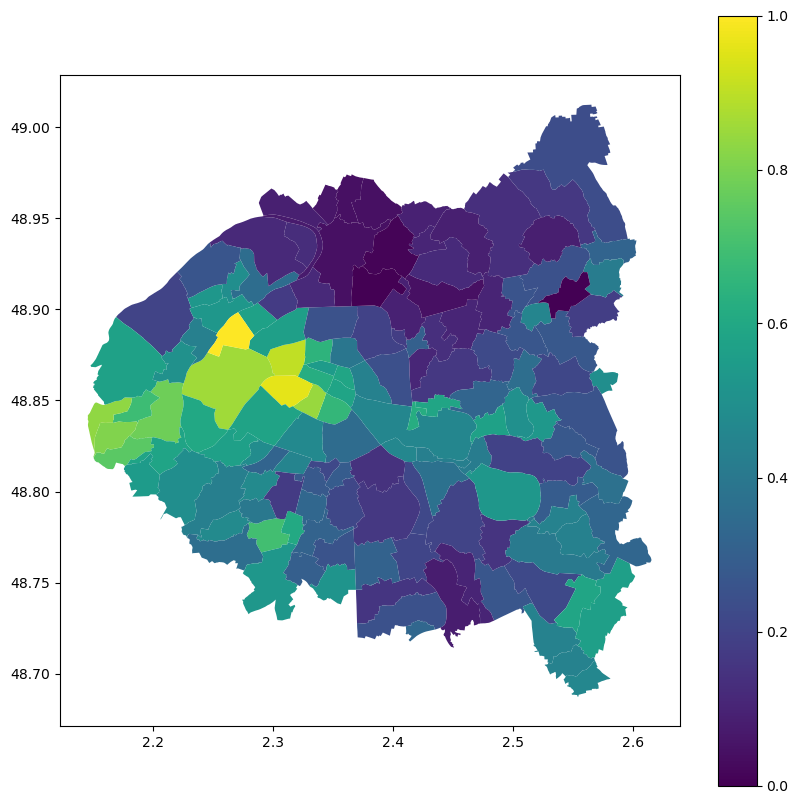

In [127]:
fig,ax = plt.subplots(figsize=(10, 10))

cities_essential.plot(ax = ax, column = "MED_14_norm", legend = True)